# **Proyek pertama : Membuat model NLP dengan TensorFlow**

## Notebook By : Michael Vincent Efren Malamo

1. Persiapan Direktori Dan Dataset

In [1]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset_Collab/job_postings.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   description                 15885 non-null  object 
 4   max_salary                  5521 non-null   float64
 5   med_salary                  981 non-null    float64
 6   min_salary                  5521 non-null   float64
 7   pay_period                  6502 non-null   object 
 8   formatted_work_type         15886 non-null  object 
 9   location                    15886 non-null  object 
 10  applies                     8700 non-null   float64
 11  original_listed_time        15886 non-null  float64
 12  remote_allowed              2340 non-null   float64
 13  views                       131

2. Seleksi kolom yang akan digunakan

In [3]:
df = df[['title','description','formatted_work_type']]
df

,title,description,formatted_work_type
0,Licensed Insurance Agent,While many industries were hurt by the last fe...,Full-time
1,Sales Manager,Are you a dynamic and creative marketing profe...,Full-time
2,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,Contract
3,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,Full-time
4,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time
...,...,...,...
15881,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time
15882,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time
15883,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time
15884,MRI Manager,Grade 105\nJob Type: Officer of Administration...,Full-time


In [4]:
category = pd.get_dummies(df.formatted_work_type)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns=['formatted_work_type'])
new_df.head()


,title,description,Contract,Full-time,Internship,Other,Part-time,Temporary,Volunteer
0,Licensed Insurance Agent,While many industries were hurt by the last fe...,0,1,0,0,0,0,0
1,Sales Manager,Are you a dynamic and creative marketing profe...,0,1,0,0,0,0,0
2,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,1,0,0,0,0,0,0
3,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,0,1,0,0,0,0,0
4,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,0,1,0,0,0,0,0


In [5]:
job = new_df['title'].values
label = new_df[['Contract','Full-time','Internship','Other','Part-time','Temporary','Volunteer']].values


3. Preprocessing Data

In [6]:
from sklearn.model_selection import train_test_split

job_latih, job_test, label_latih, label_test = train_test_split(job, label, test_size=0.2)

Penggunaan Tokenizer dan padding

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer #type:ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences  #type:ignore

tokenizer = Tokenizer (num_words=5000, oov_token='x')
tokenizer.fit_on_texts(job_latih)
tokenizer.fit_on_texts(job_test)

sequens_latih = tokenizer.texts_to_sequences(job_latih)
sequens_test = tokenizer.texts_to_sequences(job_test)

padded_latih = pad_sequences(sequens_latih)
padded_test = pad_sequences(sequens_test)

Penggunaan callbacks untuk mengatur threshold

In [14]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91):
      print('\nSelamat,akurasi melebihi 90 %')
      self.model.stop_training = True


callbacks = myCallbacks()

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax'),
])

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

Melatih Model NLP

In [26]:
num_epoch = 30

history = model.fit(
    padded_latih,
    label_latih,
    epochs = num_epoch,
    validation_data=(padded_test,label_test),
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/30
398/398 [==============================] - 16s 32ms/step - loss: 0.6765 - accuracy: 0.8116 - val_loss: 0.6192 - val_accuracy: 0.8203
Epoch 2/30
398/398 [==============================] - 5s 12ms/step - loss: 0.5205 - accuracy: 0.8330 - val_loss: 0.5439 - val_accuracy: 0.8238
Epoch 3/30
398/398 [==============================] - 3s 8ms/step - loss: 0.4399 - accuracy: 0.8519 - val_loss: 0.5573 - val_accuracy: 0.8320
Epoch 4/30
398/398 [==============================] - 3s 8ms/step - loss: 0.3928 - accuracy: 0.8684 - val_loss: 0.5830 - val_accuracy: 0.8282
Epoch 5/30
398/398 [==============================] - 3s 8ms/step - loss: 0.3659 - accuracy: 0.8746 - val_loss: 0.5471 - val_accuracy: 0.8216
Epoch 6/30
398/398 [==============================] - 4s 9ms/step - loss: 0.3427 - accuracy: 0.8820 - val_loss: 0.5908 - val_accuracy: 0.8194
Epoch 7/30
398/398 [==============================] - 3s 8ms/step - loss: 0.3290 - accuracy: 0.8862 - val_loss: 0.5933 - val_accuracy: 0.8272
Epo

Visualisasi plot akurasi Data Training Dan Data Test

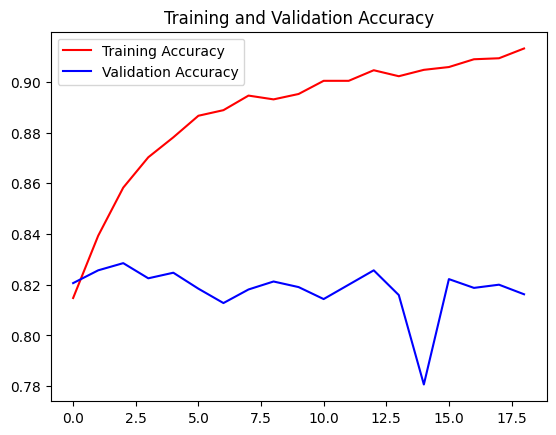

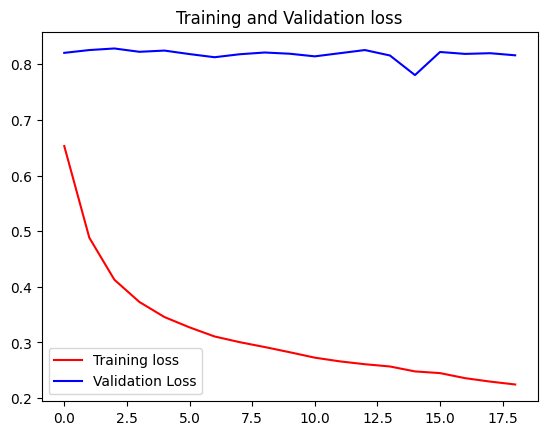

In [24]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history ['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc= 'best')
plt.show()


